### Install and import modules

In [1]:
!pip install wheel
!pip install ipynb
!pip install tensorflow
!pip install keras
!pip install numpy==1.16
from tensorflow.contrib.rnn import *
import numpy as np
import pandas as pd
from ipynb.fs.full.plot import generate_plot
from ipynb.fs.full.preprocessing import get_failure_times
from ipynb.fs.full.recurrent_neural_networks import RNN

Using TensorFlow backend.


### Train model and forecast time to earthquakes

In [2]:
training_set = pd.read_csv('C:/data/train.csv', dtype={'acoustic_data': np.float32, 'time_to_failure': np.float64})

C:\Users\ap\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Plot Generated
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/300
4195/4195 [==============================] - 6s 1ms/step - loss: 2.7820
Epoch 2/300
4195/4195 [==============================] - 5s 1ms/step - loss: 2.2261
Epoch 3/300
4195/4195 [==============================] - 5s 1ms/step - loss: 2.1934
Epoch 4/300
4195/4195 [==============================] - 5s 1ms/step - loss: 2.1770
Epoch 5/300
4195/4195 [==============================] - 5s 1ms/step - loss: 2.1450
Epoch 6/300
4195/4195 [==============================] - 5s 1ms/step - loss: 2.1399
Epoch 7/300
4195/4195 [==============================] - 5s 1ms/step - loss: 2.1188
Epoch 8/300
4195/4195 [==============================] - 5s 1ms/step - loss: 2.1056
Epoch 9/300
4195/4195 [==============================] - 5s 1ms/step - loss: 2.1084
Epoch 10/300
4195/4195 [==============================] - 5s 1ms/step - loss: 2.0905
Epoch 11/300
4195/4195 [

4195/4195 [==============================] - 7s 2ms/step - loss: 2.0168
Epoch 90/300
4195/4195 [==============================] - 7s 2ms/step - loss: 2.0199
Epoch 91/300
4195/4195 [==============================] - 7s 2ms/step - loss: 2.0338
Epoch 92/300
4195/4195 [==============================] - 7s 2ms/step - loss: 2.0229
Epoch 93/300
4195/4195 [==============================] - 7s 2ms/step - loss: 2.0240
Epoch 94/300
4195/4195 [==============================] - 7s 2ms/step - loss: 2.0067
Epoch 95/300
4195/4195 [==============================] - 7s 2ms/step - loss: 2.0161
Epoch 96/300
4195/4195 [==============================] - 7s 2ms/step - loss: 2.0162
Epoch 97/300
4195/4195 [==============================] - 7s 2ms/step - loss: 2.0196
Epoch 98/300
4195/4195 [==============================] - 7s 2ms/step - loss: 2.0026
Epoch 99/300
4195/4195 [==============================] - 7s 2ms/step - loss: 2.0167
Epoch 100/300
4195/4195 [==============================] - 7s 2ms/step - loss:

4195/4195 [==============================] - 6s 1ms/step - loss: 1.9565
Epoch 184/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9734
Epoch 185/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9529
Epoch 186/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9703
Epoch 187/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9703
Epoch 188/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9630
Epoch 189/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9519A: 0s 
Epoch 190/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9274
Epoch 191/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9673
Epoch 192/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9626
Epoch 193/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9628
Epoch 194/300
4195/4195 [==============================] - 5s 

4195/4195 [==============================] - 5s 1ms/step - loss: 1.9113
Epoch 278/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9255
Epoch 279/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9272
Epoch 280/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.8998
Epoch 281/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9137
Epoch 282/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.8964
Epoch 283/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9207
Epoch 284/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9160
Epoch 285/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.8796
Epoch 286/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9129
Epoch 287/300
4195/4195 [==============================] - 5s 1ms/step - loss: 1.9160
Epoch 288/300
4195/4195 [==============================] - 5s 1ms/st

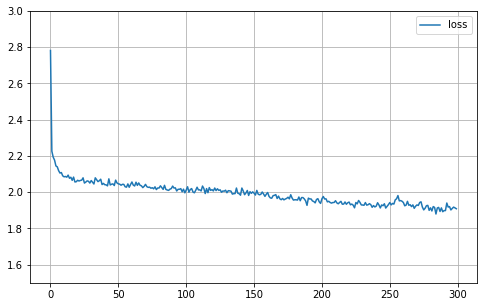

In [3]:
generate_plot(training_set)
print('Plot Generated')
failure_times = get_failure_times(training_set, 150_000)
failure_times.to_csv('C:/data/failure_times.csv')

training_set = failure_times.values
feature_count = training_set.shape[-1]-1

model = RNN(feature_count)
history = model.train(training_set, batch_size=32, epochs=300)

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    import matplotlib.pyplot as plt
    plt.grid(True)
    plt.gca().set_ylim(1.5, 3)
    plt.show()
plot_learning_curves(history)

In [4]:
def forecast(model):
    submission = pd.read_csv('C:/data/sample_submission.csv', index_col='seg_id', dtype={"time_to_failure": np.float32})

    for i, segment_id in enumerate(submission.index):
        segment = pd.read_csv('C:/data/test/' + segment_id + '.csv')
        failure_times = get_failure_times(segment, 150_000, False)
        submission.time_to_failure[i] = model.forecast(failure_times.values)

    submission.to_csv('submission.csv')
    submission.head()
    
forecast(model)